# CART算法 
- 一棵是分类树，一棵是回归树

##  1、CART算法介绍


## 2、CART算法的基本概念


## 3、CART算法的描述


## 4、CART算法的剪枝


## 5、CART 分类树的工作流程

### 实战一：如何使用CART算法来创建分类树

CART算法的分类树实际上是基于基尼系数来做属性划分的。在Python的sklearn中，如果我们要创建CART分类树，可以直接使用DecisionTreeClassifier这个类。创建这个类的时候，默认的情况下cirterion这个参数等于gini，依旧是按照基尼系数来选择属性划分，即默认采用的是CART分类树。

使用CART分类树，给iris数据集构造一棵分类决策树。iris这个数据集其实在sklearn中以被包含。基于iris数据集，构造CART分类树的代码如下：

CART 分类树准确率 0.9600


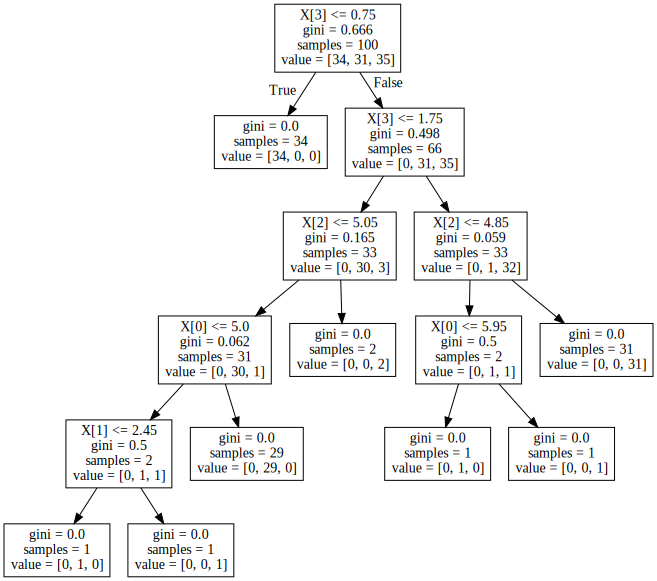

In [4]:
# encoding=UTF-8
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

import graphviz  # 导入画图包
from sklearn import tree

# 准备数据集
iris = load_iris()
# 获取特征集合分类标识
features = iris.data
labels = iris.target
# 随机抽取33%的数据作为测试集，其余为训练集
train_features,test_features,train_labels,test_labels = train_test_split(features, labels, test_size=0.33, random_state=0)
# 创建CART分类树
clf = DecisionTreeClassifier(criterion='gini')
# 拟合构造的CART分类树
clf = clf.fit(train_features,train_labels)
# 使用CART分类树进行预测
test_predict = clf.predict(test_features)
# 预测结果与测试结果集结果做对比
score = accuracy_score(test_labels,test_predict)
print("CART 分类树准确率 %.4lf" % score)

# 最后使用graphviz将决策树画出来
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

首先是train_test_split 可以帮助我们把数据集抽取一部分作为测试集，这样我们就可以得到训练集和测试集

使用clf = DecisionTreeClassifier(criterion='gini') 初始化一棵树，这样就可以对CART分类树进行训练。

使用clf.fit(train_features,train_labels)函数，将训练集的特征值和分类标识作为参数进行拟合，得到CART分类树。

使用clf.predict(test_features)函数进行预测，传入测试集的特征值，可以得到测试的结果test_predict.

最后使用accuracy_score(test_labels,test_predict)函数，传入测试集的预测结果与实际的结果作为参数，得到准确率score。

得益于sklearn包帮助对CART分类树做了封装。

## 6、CART回归树的工作流程

### 实战二：如何使用CART回归树做预测

这里使用到sklearn自带的波士顿房价的数据集，该数据集给出影响房价的一些指标，比如犯罪率，房产税等，最后给出了房价。

可以根据这些指标使用CART回归树对波士顿的房价进行预测:

In [13]:
# encoding = utf-8
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor

import graphviz  # 导入画图包
from sklearn import tree


# 准备数据集
boston = load_boston()
# 探索数据
print(boston.feature_names)
# 获取特征集和房价
features = boston.data
prices = boston.target
# 随机抽取33%的数据作为测试集其余的为训练集
train_features, test_features, train_price, test_price = train_test_split(features,prices, test_size=0.33)
# 创建CART回归树
dtr = DecisionTreeRegressor()
# 拟合构造的CART回归树
dtr.fit(train_features, train_price)
# 预测测试集中的房价
predict_price = dtr.predict(test_features)
# 测试集的结果评价
print('回归树二乘偏差的均值：',mean_squared_error(test_price, predict_price))
print('回归树的绝对值偏差均值：', mean_absolute_error(test_price, predict_price))

# 最后使用graphviz将决策树画出来
dot_data = tree.export_graphviz(dtr, out_file=None)
graph = graphviz.Source(dot_data)
# graph

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
回归树二乘偏差的均值： 25.31946107784431
回归树的绝对值偏差均值： 3.0053892215568854


首先加载波士顿的房价的数据集，得到特征集和房价。然后通过train_test_split帮助我们把数据抽取一部分作为测试集，其余作为训练集。

使用dtr = DecisionTreeRegressor()初始化一棵CART的回归树。

使用dtr.fit(train_features, train_price)函数, 将训练集的特征集和结果做为参数进行拟合， 得到CART的回归树；

使用dtr.predict(test_features)函数进行预测，传入测试集的特征集可以的到预测的结果predict_price。

最后求得这棵回归树的二乘偏差均值，以及绝对偏差均值。可以看到CART回归树的使用和分类树的使用类似，只是最后求得的预测值是个连续的值。

## 总结
CART是一种决策二叉树，即可以用做分类树，也可以用做回归树，注意两点：

- 作为分类树：CART采用基尼系数作为结点划分的依旧，得到的是离散的结果，也就是分类的结果；
- 作为回归树：CART可以是采用最小的绝对偏差（LAD），或者最小二乘偏差（LSD）作为结点划分的依据，得到的是连续值，即回归预测结果

三种决策树之间在属性选择标准上的差异：
- ID3算法：基于信息增益做判断；
- C4.5算法：基于信息增益率做判断；
- CART算法：分类树是基于基尼系数做判断。回归树是居于偏差做判断。

实际上，这三个指标也是计算“不纯度”的三种计算方式。

在工具的使用上，饿哦们可以使用sklearn中的DecisionTreeClassifier创建CART分类树，通过DecisionTreeRegressor创建CART回归树。



## 思考题
1、ID3和C4.5，以及CART分类树在做结点划分的时候的区别：
- ID3和C4.5在做结点划分的时候，构建成的数可以是多叉树或者二叉树，但是CART算法只能构成二叉树，对于取多个值的属性变量，需要将多个类别合并成两个类别，形成超类，然后计算两个“超类”下样本测试输出取得的差异性。

2、构建分类树

In [23]:
# encoding=utf-8
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits

# 准备数据集
digits = load_digits()
# 获取特征集和分类标识
features = digits.data
labels = digits.target
# 随机抽取 33% 的数据作为测试集，其余为训练集
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=0)
# 创建CART 分类树
clf = DecisionTreeClassifier(criterion='gini')
# 拟合构造CART分类树
clf = clf.fit(train_features, train_labels)
# 用CART 分类树做预测
test_predict = clf.predict(test_features)
# 预测结果与测试结果做对比
score = accuracy_score(test_labels, test_predict)
print("CART 分类树准确率 %.4lf" % score)


CART 分类树准确率 0.8687
